In [37]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from scipy.stats import normaltest, chi2_contingency, mannwhitneyu, ttest_ind, skew

# # Mount Google Drive
# from google.colab import drive
# drive.mount('/content/drive')
# file_path = '/content/drive/My Drive/Capstone_Mod2/SaaS-Sales.csv'

# try:
#   df = pd.read_csv(file_path)
#   print("Successfully imported CSV to DataFrame.")
# except FileNotFoundError:
#   print(f"Error: File not found at {file_path}. Please check the file path.")
# except pd.errors.ParserError:
#   print(f"Error: Could not parse the CSV file. Please check the file format.")
# except Exception as e:
#   print(f"An unexpected error occurred: {e}")

df = pd.read_csv('SaaS-Sales.csv')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Successfully imported CSV to DataFrame.


# Data
This dataset contains transaction data from a fictitious SaaS company selling sales and marketing software to other companies (B2B). In the dataset, each row represents a single transaction/order (_9,994 transactions_), and the columns include:


* Row ID: A unique identifier for each transaction.
*	Order ID:	A unique identifier for each order.
* Order Date:	The date when the order was placed.
*	Date Key:	A numerical representation of the order date (YYYYMMDD).
*	Contact Name:	The name of the person who placed the order.
*	Country:	The country where the order was placed.
*	City:	The city where the order was placed.
*	Region:	The region where the order was placed.
*	Subregion: The subregion where the order was placed.
*	Customer:	The name of the company that placed the order.
*	Customer ID:	A unique identifier for each customer.
*	Industry: The industry the customer belongs to.
*	Segment:	The customer segment (SMB, Strategic, Enterprise, etc.).
*	Product:	The product was ordered.
*	License: The license key for the product.
*	Sales: The total sales amount for the transaction.
*	Quantity: The total number of items in the transaction.
*	Discount: The discount applied to the transaction.
*	Profit: The profit from the transaction.

Below the top and bottom five rows of the dataset are displayed.

In [38]:
display(df.head(),df.tail())

,Row ID,Order ID,Order Date,Date Key,Contact Name,Country,City,Region,Subregion,Customer,Customer ID,Industry,Segment,Product,License,Sales,Quantity,Discount,Profit
0,1,EMEA-2022-152156,11/9/2022,20221109,Nathan Bell,Ireland,Dublin,EMEA,UKIR,Chevron,1017,Energy,SMB,Marketing Suite,16GRM07R1K,261.9600,2,0.00,41.9136
1,2,EMEA-2022-152156,11/9/2022,20221109,Nathan Bell,Ireland,Dublin,EMEA,UKIR,Chevron,1017,Energy,SMB,FinanceHub,QLIW57KZUV,731.9400,3,0.00,219.5820
2,3,AMER-2022-138688,6/13/2022,20220613,Deirdre Bailey,United States,New York City,AMER,NAMER,Phillips 66,1056,Energy,Strategic,FinanceHub,JI6BVL70HQ,14.6200,2,0.00,6.8714
3,4,EMEA-2021-108966,10/11/2021,20211011,Zoe Hodges,Germany,Stuttgart,EMEA,EU-WEST,Royal Dutch Shell,1031,Energy,SMB,ContactMatcher,DE9GJKGD44,957.5775,5,0.45,-383.0310
4,5,EMEA-2021-108966,10/11/2021,20211011,Zoe Hodges,Germany,Stuttgart,EMEA,EU-WEST,Royal Dutch Shell,1031,Energy,SMB,Marketing Suite - Gold,OIF7NY23WD,22.3680,2,0.20,2.5164


,Row ID,Order ID,Order Date,Date Key,Contact Name,Country,City,Region,Subregion,Customer,Customer ID,Industry,Segment,Product,License,Sales,Quantity,Discount,Profit
9989,9990,EMEA-2020-110422,1/22/2020,20200122,Dan Allan,Germany,Hamburg,EMEA,EU-WEST,Johnson & Johnson,1055,Healthcare,SMB,SaaS Connector Pack,ETHXMB5TMD,25.248,3,0.2,4.1028
9990,9991,AMER-2023-121258,2/27/2023,20230227,Anthony Sanderson,United States,Milwaukee,AMER,NAMER,American Express,1005,Finance,SMB,SaaS Connector Pack,LYHOKTRY7L,91.960,2,0.0,15.6332
9991,9992,AMER-2023-121258,2/27/2023,20230227,Anthony Sanderson,United States,Milwaukee,AMER,NAMER,American Express,1005,Finance,SMB,Site Analytics,I5SVMI6M88,258.576,2,0.2,19.3932
9992,9993,AMER-2023-121258,2/27/2023,20230227,Anthony Sanderson,United States,Milwaukee,AMER,NAMER,American Express,1005,Finance,SMB,Support,JHLW4P6LQ2,29.600,4,0.0,13.3200
9993,9994,AMER-2023-119914,5/5/2023,20230505,Jasmine Springer,United States,Dallas,AMER,NAMER,Comcast,1022,Communications,SMB,OneView,3NTBV9B3PS,243.160,2,0.0,72.9480


# Data Understanding and Cleaning

In [39]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 19 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Row ID        9994 non-null   int64  
 1   Order ID      9994 non-null   object 
 2   Order Date    9994 non-null   object 
 3   Date Key      9994 non-null   int64  
 4   Contact Name  9994 non-null   object 
 5   Country       9994 non-null   object 
 6   City          9994 non-null   object 
 7   Region        9994 non-null   object 
 8   Subregion     9994 non-null   object 
 9   Customer      9994 non-null   object 
 10  Customer ID   9994 non-null   int64  
 11  Industry      9994 non-null   object 
 12  Segment       9994 non-null   object 
 13  Product       9994 non-null   object 
 14  License       9994 non-null   object 
 15  Sales         9994 non-null   float64
 16  Quantity      9994 non-null   int64  
 17  Discount      9994 non-null   float64
 18  Profit        9994 non-null 

In [40]:
display(df.describe(), df.describe(include='object'))

,Row ID,Date Key,Customer ID,Sales,Quantity,Discount,Profit
count,9994.000000,9.994000e+03,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000
mean,4997.500000,2.021803e+07,1049.771963,229.858001,3.789574,0.156203,28.656896
std,2885.163629,1.123898e+04,29.719388,623.245101,2.225110,0.206452,234.260108
min,1.000000,2.020010e+07,1001.000000,0.444000,1.000000,0.000000,-6599.978000
25%,2499.250000,2.021052e+07,1024.000000,17.280000,2.000000,0.000000,1.728750
50%,4997.500000,2.022063e+07,1049.000000,54.490000,3.000000,0.200000,8.666500
75%,7495.750000,2.023052e+07,1076.000000,209.940000,5.000000,0.200000,29.364000
max,9994.000000,2.023123e+07,1101.000000,22638.480000,14.000000,0.800000,8399.976000


,Order ID,Order Date,Contact Name,Country,City,Region,Subregion,Customer,Industry,Segment,Product,License
count,9994,9994,9994,9994,9994,9994,9994,9994,9994,9994,9994,9994
unique,5009,1237,793,48,262,3,12,99,10,3,14,9994
top,EMEA-2023-100111,9/6/2022,Leonard Kelly,United States,London,EMEA,NAMER,Allianz,Finance,SMB,ContactMatcher,16GRM07R1K
freq,14,38,37,2001,922,4219,2507,192,2127,5191,1842,1


Next, we will see the unique values in every columns.



In [41]:
listItem = []
for col in df.columns :
    listItem.append( [col, df[col].nunique(), df[col].unique()])

tabel1Desc = pd.DataFrame(columns=['Column Name', 'Number of Unique', 'Unique Sample'],
                     data=listItem)
tabel1Desc

,Column Name,Number of Unique,Unique Sample
0,Row ID,9994,"[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14..."
1,Order ID,5009,"[EMEA-2022-152156, AMER-2022-138688, EMEA-2021..."
2,Order Date,1237,"[11/9/2022, 6/13/2022, 10/11/2021, 6/9/2020, 4..."
3,Date Key,1237,"[20221109, 20220613, 20211011, 20200609, 20230..."
4,Contact Name,793,"[Nathan Bell, Deirdre Bailey, Zoe Hodges, Thom..."
5,Country,48,"[Ireland, United States, Germany, Sweden, Cana..."
6,City,262,"[Dublin, New York City, Stuttgart, Stockholm, ..."
7,Region,3,"[EMEA, AMER, APJ]"
8,Subregion,12,"[UKIR, NAMER, EU-WEST, NOR, JAPN, EU, MEA, LAT..."
9,Customer,99,"[Chevron, Phillips 66, Royal Dutch Shell, BNP ..."


Some general insights so far:
* The dataset has 19 columns and 9994 rows.
* There are most likely no missing values in the dataset. (No NaN values)
* There are 9994 unique `Row ID` values for each entry, but only 5009 unique `Order ID` values. Further analysis is needed to determine if this is an error.
* Some columns can be dropped due to its irrelevance to analysis, such as:
  * column `Row ID`, which contains unique ID for each entry.
  * `Date Key`, which contains the same info as `Order Date`.
* `Order Date` should be converted from object to datetime for easier handling in further analysis.
* `Customer ID` should be converted from int to object since it is not a feature that needed to be analyzed numerically.
* It might be beneficial to add a new feature `Profit Margin` to understand the percentage of profit each entry is making.

In [42]:
# Convert 'Order Date' and 'Customer ID'
df['Order Date'] = df['Order Date'].astype('datetime64[ns]')
df['Customer ID'] = df['Customer ID'].astype(str)

# Drop 'Row ID' and 'Date Key
df = df.drop(columns=['Row ID','Date Key'])

# Add column 'Profit Margin'
df['Profit Margin'] =round((df['Profit']/df['Sales'])*100,  2)

In [43]:
# Check
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Order ID       9994 non-null   object        
 1   Order Date     9994 non-null   datetime64[ns]
 2   Contact Name   9994 non-null   object        
 3   Country        9994 non-null   object        
 4   City           9994 non-null   object        
 5   Region         9994 non-null   object        
 6   Subregion      9994 non-null   object        
 7   Customer       9994 non-null   object        
 8   Customer ID    9994 non-null   object        
 9   Industry       9994 non-null   object        
 10  Segment        9994 non-null   object        
 11  Product        9994 non-null   object        
 12  License        9994 non-null   object        
 13  Sales          9994 non-null   float64       
 14  Quantity       9994 non-null   int64         
 15  Discount       9994 n

## Check for missing values

In [44]:
# Percentage of missing values
df.isna().sum()/df.shape[0]*100

,0
Order ID,0.0
Order Date,0.0
Contact Name,0.0
Country,0.0
City,0.0
Region,0.0
Subregion,0.0
Customer,0.0
Customer ID,0.0
Industry,0.0


It is confirmed that there are no missing values in the dataset.

## Check for whitespace

In [45]:
# Check for leading/trailing whitespace in object columns
for col in df.select_dtypes(include='object'):
  if df[col].str.contains(r'^\s+|\s+$').any():  # Check for leading/trailing spaces
    print(f"Column '{col}' has excessive whitespace.")
  if df[col].str.contains(r'\s{2,}').any():  # Check for multiple spaces within the string
    print(f"Column '{col}' has multiple spaces within the string.")

There is no excessive whitespace in the dataset.

## Check for duplicated data

Now, we check for duplicated data.
* Check on duplicate rows to see if there are duplicated data in general.
* We also check on the `Order ID` to follow up on the previous insight that we only have 5009 unique `Order ID` values.

In [46]:
# Check for duplicate rows
duplicate_rows = df[df.duplicated(keep=False)]
if not duplicate_rows.empty:
    print("Duplicate rows found:")
    print(duplicate_rows)
else:
    print("No duplicate rows found.")

# Check for duplicates based on 'Order ID'
df[df['Order ID'].duplicated(keep=False)].head()
duplicate_orders = df[df['Order ID'].duplicated(keep=False)]
if not duplicate_orders.empty:
    print("\nDuplicate orders found:")
    print(duplicate_orders)
else:
    print("\nNo duplicate orders found.")

No duplicate rows found.

Duplicate orders found:
              Order ID Order Date       Contact Name        Country  \
0     EMEA-2022-152156 2022-11-09        Nathan Bell        Ireland   
1     EMEA-2022-152156 2022-11-09        Nathan Bell        Ireland   
3     EMEA-2021-108966 2021-10-11         Zoe Hodges        Germany   
4     EMEA-2021-108966 2021-10-11         Zoe Hodges        Germany   
5     AMER-2020-115812 2020-06-09      Thomas Hodges  United States   
...                ...        ...                ...            ...   
9987  EMEA-2023-163629 2023-11-18      Dylan Dickens        Finland   
9988  EMEA-2023-163629 2023-11-18      Dylan Dickens        Finland   
9990  AMER-2023-121258 2023-02-27  Anthony Sanderson  United States   
9991  AMER-2023-121258 2023-02-27  Anthony Sanderson  United States   
9992  AMER-2023-121258 2023-02-27  Anthony Sanderson  United States   

               City Region Subregion           Customer Customer ID  \
0            Dublin   EMEA

No duplicate rows are found.

There are a lot of duplicate order IDs. Upon inspection,  this happens because there are multiple products being ordered in one order, so no further action is needed.

## Check for outliers

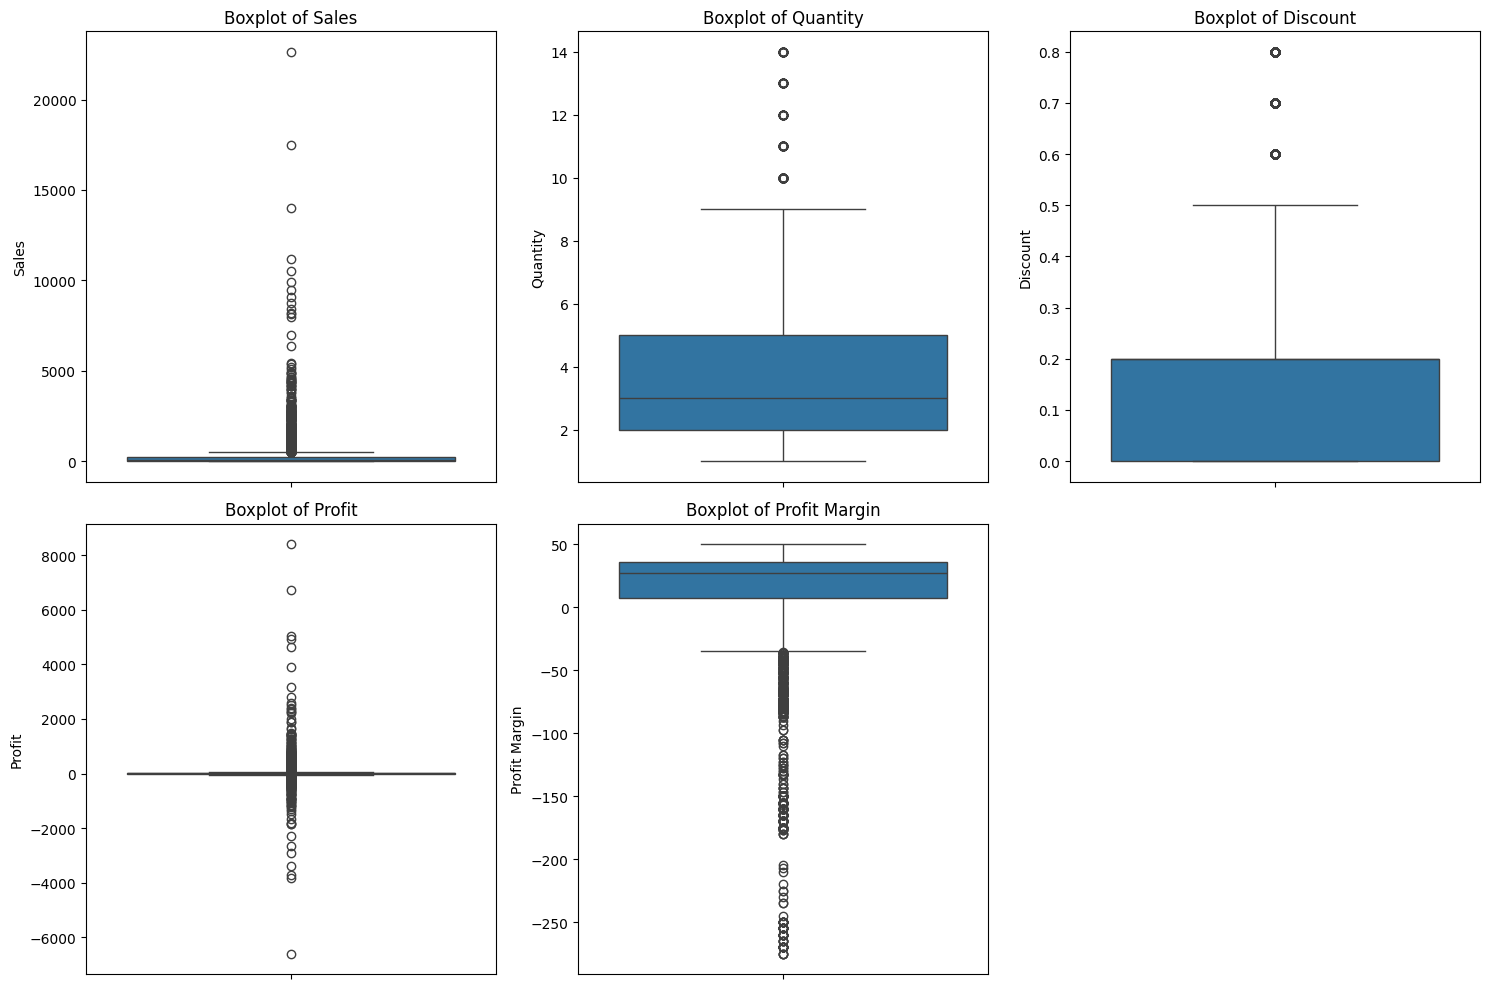

In [47]:
# Check for outliers using boxplots for numerical features
numerical_features = ['Sales', 'Quantity', 'Discount', 'Profit', 'Profit Margin']
plt.figure(figsize=(15, 10))

for i, col in enumerate(numerical_features):
    plt.subplot(2, 3, i+1)
    sns.boxplot(y=df[col])
    plt.title(f'Boxplot of {col}')
    plt.ylabel(col)

plt.tight_layout()
plt.show()

In [48]:
# Check for outliers using IQR
def detect_outliers(data):
    Q1 = data.quantile(0.25)
    Q3 = data.quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = data[(data < lower_bound) | (data > upper_bound)]
    return round(lower_bound), round(upper_bound), outliers

outlier_results = []

for col in numerical_features:
    lower_bound, upper_bound, outliers = detect_outliers(df[col])
    outlier_count = len(outliers)
    outlier_indices = outliers.index.tolist()
    outlier_results.append([col, lower_bound, upper_bound, outlier_count, outlier_indices])

outlier_df = pd.DataFrame(outlier_results, columns=['Column', 'Lower Bound', 'Upper Bound', 'Number of Outliers', 'Outlier Indices'])
outlier_df

,Column,Lower Bound,Upper Bound,Number of Outliers,Outlier Indices
0,Sales,-272,499,1167,"[1, 3, 7, 10, 11, 16, 24, 27, 35, 38, 54, 67, ..."
1,Quantity,-2,10,170,"[113, 139, 147, 251, 329, 341, 342, 343, 375, ..."
2,Discount,0,0,856,"[14, 15, 28, 32, 36, 75, 76, 78, 95, 101, 105,..."
3,Profit,-40,71,1881,"[1, 3, 7, 10, 13, 14, 24, 27, 35, 36, 38, 54, ..."
4,Profit Margin,-36,79,952,"[3, 14, 15, 27, 28, 32, 36, 75, 76, 78, 95, 10..."


**Insights**:

* **Sales**

    This feature has a large amount of outliers (1167). This indicates that sales figures that is much higher than expected values frequently happens.

* **Quantity**

    This feature has a far less amount of outliers (170). This indicates that orders that include a much higher or lower quantity of products happen far less frequently.

* **Discount**

    This feature has both the lower and upper bound of 0, which indicates that the almost all of values in this column is 0. Therefore, the 856 outliers are the values that are higher than 0 (as this column only contains positive values).

* **Profit**

    This feature, similar to `Sales`, has a high amount of outliers (1881). This indicates that there are a lot of occurences where the profits are much higher or lower than expected values.


**Implications:**

Although the dataset contains a very high amount of outliers, it appears that they do not appear out of error and are important to be analyzed. Therefore, no further actions will be taken at this time.


## Distribution and normality of data

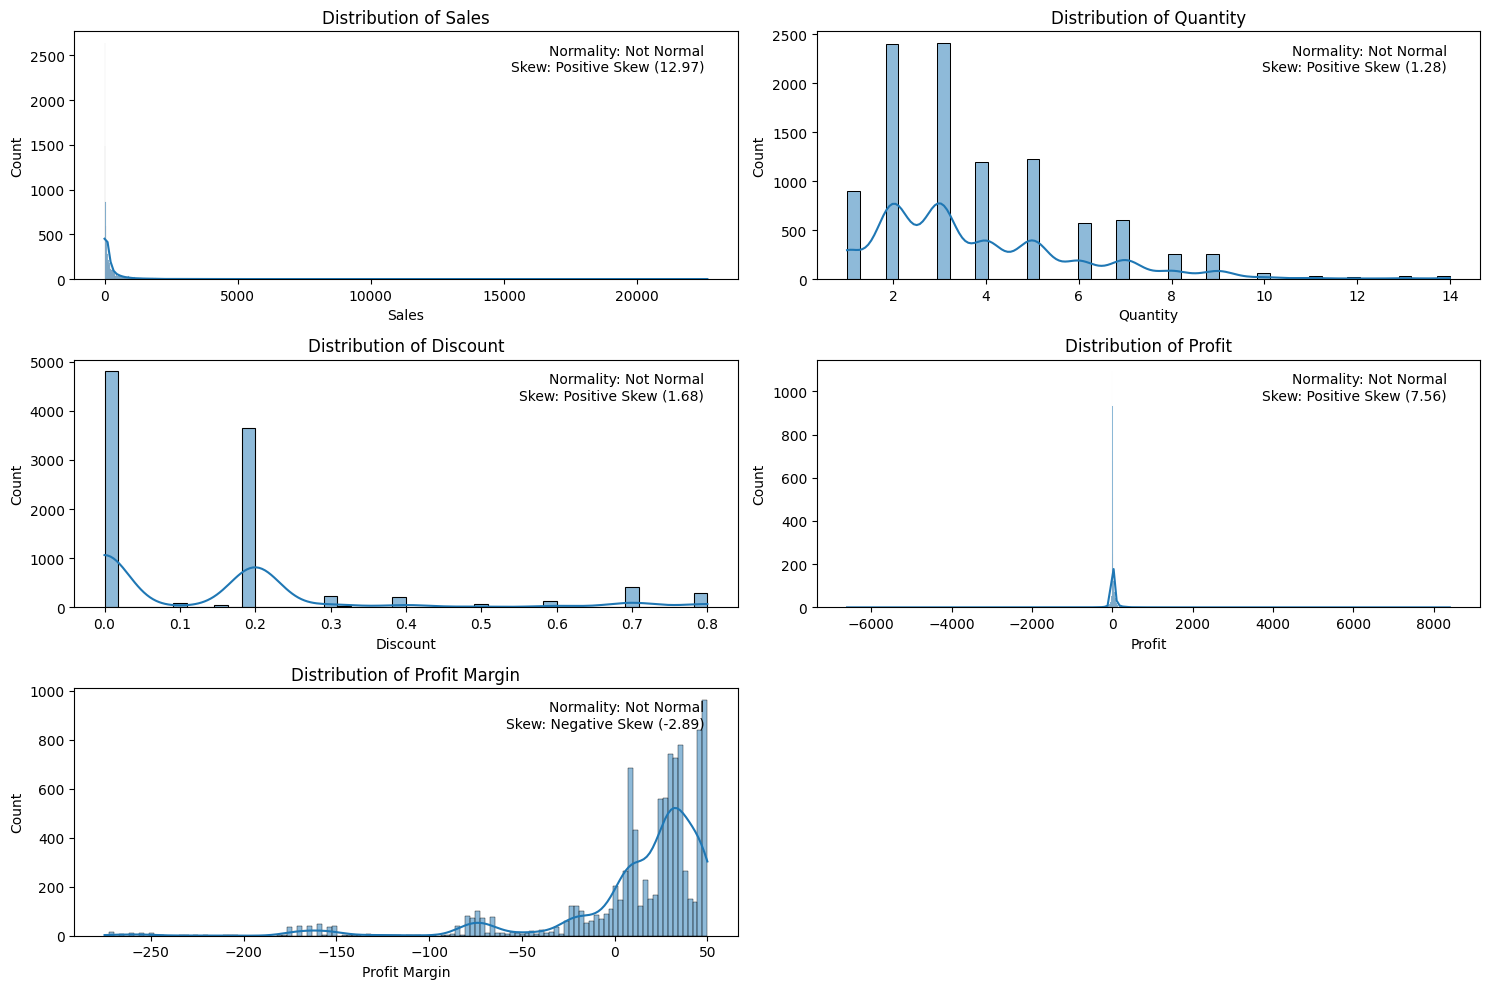

In [49]:
plt.figure(figsize=(15, 10))

for i, col in enumerate(numerical_features):
    plt.subplot(3, 2, i + 1)
    sns.histplot(df[col], kde=True)
    plt.title(f'Distribution of {col}')

    # Normality test
    k2, p = normaltest(df[col])
    normality = "Normal" if p > 0.05 else "Not Normal"

    # Skewness
    sk = skew(df[col])
    skew_type = "Positive Skew" if sk > 0 else "Negative Skew" if sk < 0 else "No Skew"

    plt.text(0.95, 0.95, f"Normality: {normality}\nSkew: {skew_type} ({round(sk,2)})",
             transform=plt.gca().transAxes, ha='right', va='top')

plt.tight_layout()
plt.show()

In [50]:
df[numerical_features].describe()

,Sales,Quantity,Discount,Profit,Profit Margin
count,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000
mean,229.858001,3.789574,0.156203,28.656896,12.031390
std,623.245101,2.225110,0.206452,234.260108,46.675436
min,0.444000,1.000000,0.000000,-6599.978000,-275.000000
25%,17.280000,2.000000,0.000000,1.728750,7.500000
50%,54.490000,3.000000,0.200000,8.666500,27.000000
75%,209.940000,5.000000,0.200000,29.364000,36.250000
max,22638.480000,14.000000,0.800000,8399.976000,50.000000


Due to the large amount of outliers in `Sales` and `Profit`, it is difficult to analyze the distribution of values in those columns. For this purpose, outliers will be removed.

In [51]:
# Removing extreme outliers based on IQR for 'Sales' and 'Profit'
def remove_outliers(df, column_name):
    Q1 = df[column_name].quantile(0.25)
    Q3 = df[column_name].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    df_filtered = df[(df[column_name] >= lower_bound) & (df[column_name] <= upper_bound)]
    return df_filtered

# Removing outliers for 'Sales'
df_clean = remove_outliers(df, 'Sales')

# Removing outliers for 'Profit' from the already filtered dataframe
df_clean = remove_outliers(df_clean, 'Profit')

outliers_removed = len(df) - len(df_clean)
print(f"{outliers_removed} outliers removed.")

2602 outliers removed.


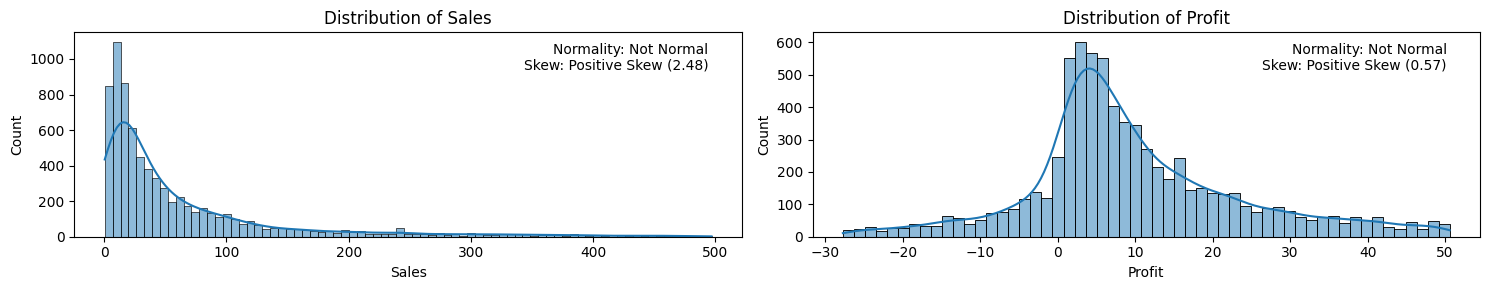

,Sales,Profit
count,7392.000000,7392.000000
mean,62.314599,9.636050
std,82.271335,13.843595
min,0.444000,-27.735000
25%,12.960000,2.133200
50%,30.560000,6.797800
75%,75.850000,16.016250
max,496.860000,50.584800


In [52]:
plt.figure(figsize=(15, 3))

for i, col in enumerate(['Sales','Profit']):
    plt.subplot(1, 2, i + 1)
    sns.histplot(df_clean[col], kde=True)
    plt.title(f'Distribution of {col}')

    # Normality test
    k2, p = normaltest(df_clean[col])
    normality = "Normal" if p > 0.05 else "Not Normal"

    # Skewness
    sk = skew(df_clean[col])
    skew_type = "Positive Skew" if sk > 0 else "Negative Skew" if sk < 0 else "No Skew"

    plt.text(0.95, 0.95, f"Normality: {normality}\nSkew: {skew_type} ({round(sk,2)})",
             transform=plt.gca().transAxes, ha='right', va='top')

plt.tight_layout()
plt.show()

df_clean[['Sales','Profit']].describe()

It appears that there are a significant number of negative profit in the dataset. So we check the percentage of these transactions.

In [67]:
# Calculate the percentage of negative profit in the original and cleaned dataframes
neg_profit_df = len(df[df['Profit'] < 0]) / len(df) * 100
neg_profit_df_clean = len(df_clean[df_clean['Profit'] < 0]) / len(df_clean) * 100

print(f"Percentage of negative profit (with outliers): {neg_profit_df:.2f}%")
print(f"Percentage of negative profit (without outliers): {neg_profit_df_clean:.2f}%")

Percentage of negative profit (with outliers): 18.72%
Percentage of negative profit (without outliers): 14.65%


**Insights**:
* **Sales**

    * This feature is _highly positively skewed_. This indicates a high frequency of low sales values with a few very high sales values that significantly affect the mean.
    * Even after removing the outliers, `Sales` still has a strong positive skew. This suggests that a significant number of transactions have relatively low sales values, most of them close to 0 sales.

* **Quantity**

    This feature is _moderately positively skewed_. This indicates that most transactions involve a lower quantity of items sold with some transactions with larger quantities.

* **Discount**

    This feature is _moderately positively skewed_. Similar to `Quantity`, most discounts are low, with the majority at 0, but there are a few cases where higher discounts are offered.

* **Profit**

    * This feature is _highly positively skewed_. Most profits are on the lower end, but a few transactions with very high profits are affecting the mean. This indicates that the overall profitability is not uniformly distributed and that certain transactions are exceptionally profitable.
    * The descriptive analytics also reveals that there are transactions with extremely low profit (-6599) and extremely high profit (8399). Further analysis is needed.
    * Most concerningly, 19% of the transactions have a profit of below 0. Even with the outliers removed, 15% are still below 0. Further analysis is needed.

* **Profit Margin**

    This feature is _moderately negatively skewed_. This indicates that while most profit margins are high, there are some instances of very low or negative profit margins.


**Implications:**
* A significant amount of transactions have a negative profit. Further analysis is needed to see the factors that are involved in this trend.
* The distributions imply that a small number of high-value sales and profits are driving overall performance. Further analysis is needed to understand the reason of these exceptional cases.
* The negative skew in profit margin suggests that while most transactions are quite profitable, some may require further investigation to understand why certain sales have low margins.

# Data Analysis and Visualization

## Negative Profits
In the previous section, we have identified a point of interest in the Profit column, particularly the significant amount of transactions with negative profit. First we investigate the total profit per product.

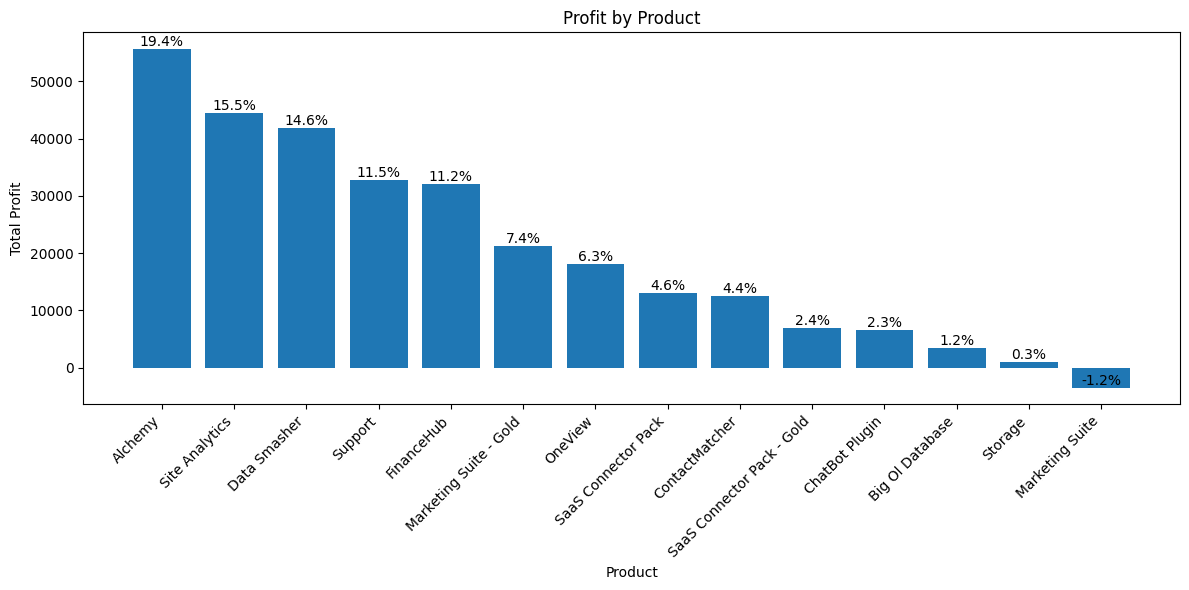

In [87]:
# Group by product and sum profits
product_profit = df.groupby('Product')['Profit'].sum().sort_values(ascending=False)

# Create the bar plot
plt.figure(figsize=(12, 6))
bars = plt.bar(product_profit.index, product_profit.values)
plt.xlabel("Product")
plt.ylabel("Total Profit")
plt.title("Profit by Product")
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for readability

# Add percentage labels above each bar
total_profit = product_profit.sum()
for bar in bars:
    height = bar.get_height()
    percentage = (height / total_profit) * 100
    plt.text(bar.get_x() + bar.get_width() / 2, height, f'{percentage:.1f}%', ha='center', va='bottom')

plt.tight_layout()  # Adjust layout to prevent labels from overlapping
plt.show()

**Insights**
* Almost all products have a positive total profit, with the top performer being **Alchemy** contributing 19.4% of profit.
* **Marketing Suite** is the only product that has negative profit, responsible for -1.2% of total profit. Further investigation is needed.

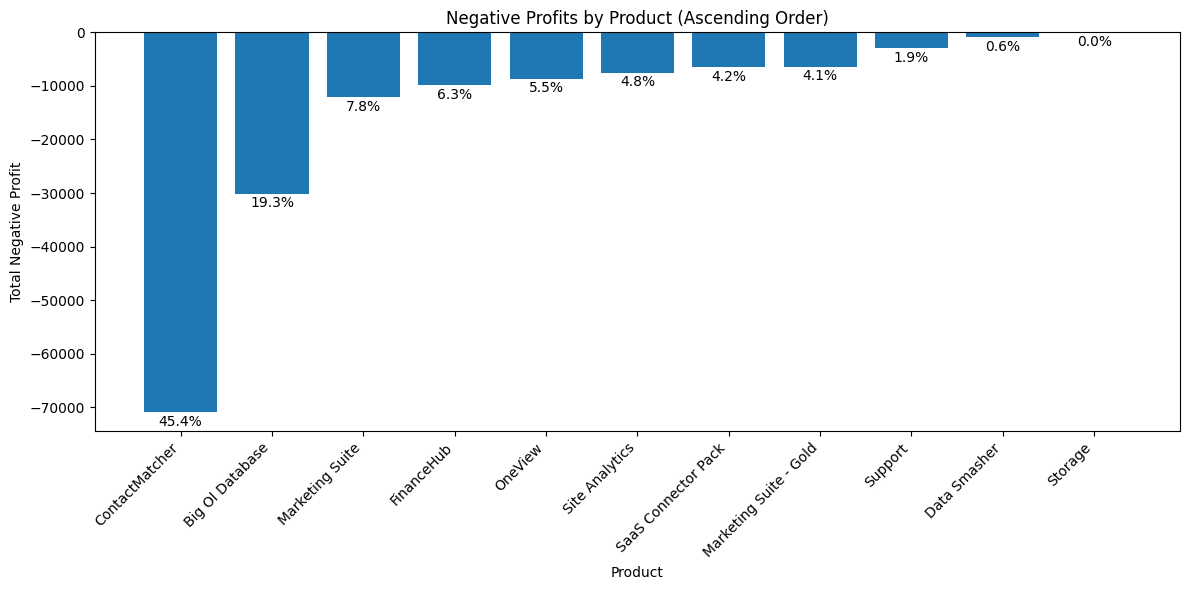

In [89]:
# prompt: negative profits by product, ascending order, use plt with percentage below bar

import matplotlib.pyplot as plt

# Assuming 'df' is your DataFrame and the analysis from the previous code has been run

# Filter for negative profits
negative_profits = df[df['Profit'] < 0].groupby('Product')['Profit'].sum().sort_values()

# Create the bar plot
plt.figure(figsize=(12, 6))
bars = plt.bar(negative_profits.index, negative_profits.values)
plt.xlabel("Product")
plt.ylabel("Total Negative Profit")
plt.title("Negative Profits by Product (Ascending Order)")
plt.xticks(rotation=45, ha='right')

# Add percentage labels below each bar
total_negative_profit = negative_profits.sum()
for bar in bars:
    height = bar.get_height()
    percentage = abs(height / total_negative_profit) * 100  # Use absolute value for percentage
    plt.text(bar.get_x() + bar.get_width() / 2, height - 500, f'{percentage:.1f}%', ha='center', va='top', color='black') # Adjust vertical position as needed

plt.tight_layout()
plt.show()

## Correlation analysis
To see which features needed to be analyzed, we check the correlation of the numerical features in the form of heatmap for easier analysis.

,Sales,Quantity,Discount,Profit,Profit Margin
Sales,1.000000,0.200795,-0.028190,0.479064,0.003443
Quantity,0.200795,1.000000,0.008623,0.066253,-0.005280
Discount,-0.028190,0.008623,1.000000,-0.219487,-0.864452
Profit,0.479064,0.066253,-0.219487,1.000000,0.223732
Profit Margin,0.003443,-0.005280,-0.864452,0.223732,1.000000


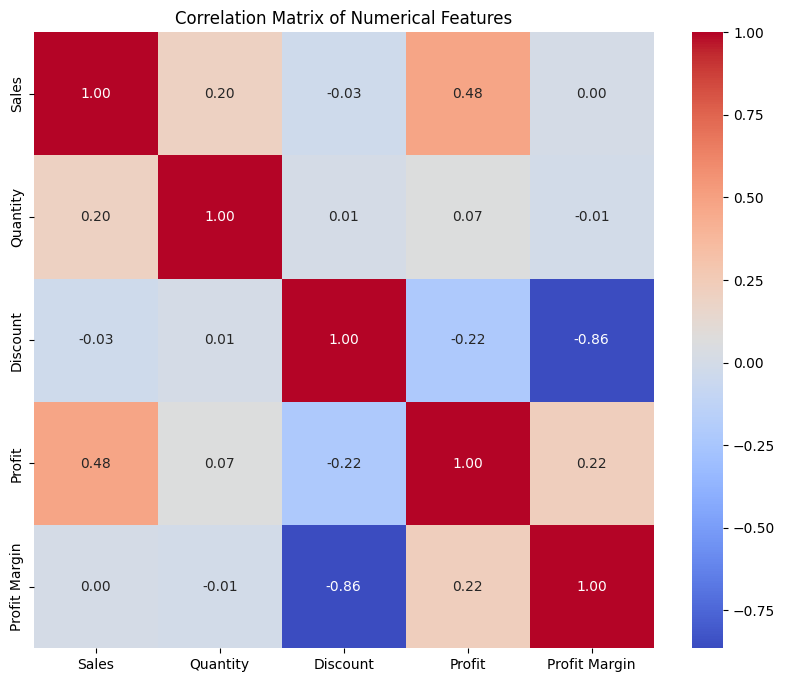

In [53]:
# Check for correlation using Pearson correlation
correlation_matrix = df.corr(numeric_only=True)
display(correlation_matrix)

# Visualize the correlation matrix using a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Numerical Features')
plt.show()

Based on this heatmap, we can identify relationships that need further investigation:

* `Sales` and `Profit`
* `Sales` and `Quantity`
* `Profit` and `Discount`
* `Profit` and `Profit Margin`
* `Profit Margin` and `Discount`

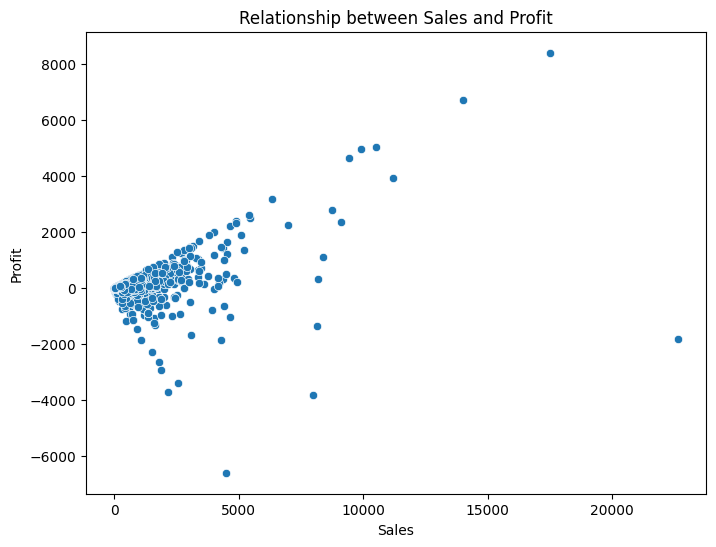

In [90]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x='Sales', y='Profit', data=df)
plt.title('Relationship between Sales and Profit')
plt.xlabel('Sales')
plt.ylabel('Profit')
plt.show()